In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from scipy.signal import find_peaks
from sklearn.cluster import MeanShift, estimate_bandwidth

def region_growing(image, seed, threshold, connectivity=4): #conn=neighbors
    rows, cols = image.shape
    segmented_done = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    
    seed_value = image[seed]
    queue = [seed]
    
    ##Define path based on neighbors
    if connectivity == 4:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]  #4nei
    else:
        neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]  #8nei
    
    while queue:
        x, y = queue.pop(0)
        
        if visited[x, y]:
            continue
        
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) < threshold:
            segmented_done[x, y] = 255
            
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                    queue.append((nx, ny))
                #if 0 >= nx > rows and 0 >= ny > cols and not visited[nx, ny]:
                    #queue.append((nx, ny))
    return segmented_done

### Failure due to seed start point img1 

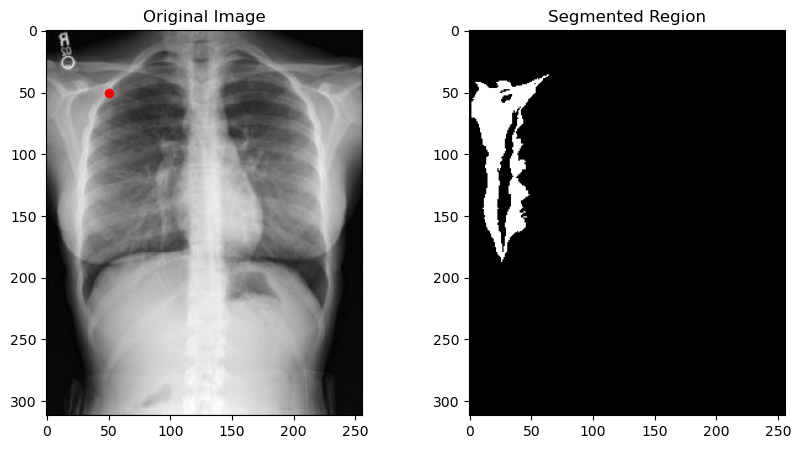

In [8]:
image = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)
seed = (50, 50) 
threshold = 20

segmented = region_growing(image, seed, threshold, connectivity=8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.scatter([seed[1]], [seed[0]], color='red')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Region")
plt.show()


### Good seed start point img1

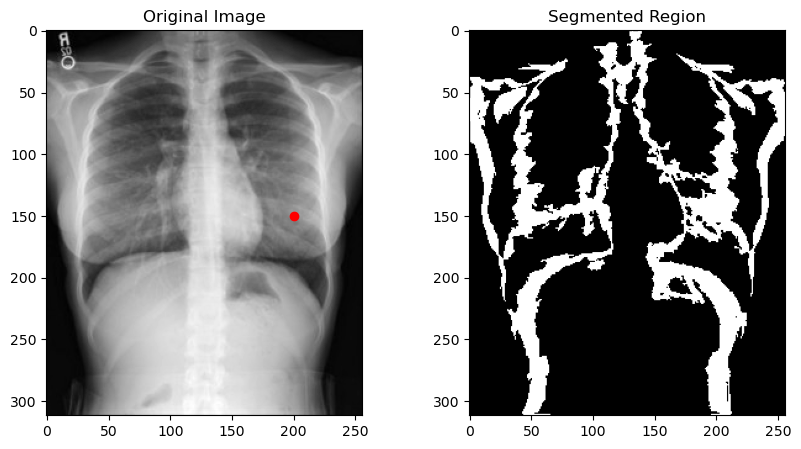

In [9]:
image = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)
seed = (150, 200) 
threshold = 20

segmented = region_growing(image, seed, threshold, connectivity=8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.scatter([seed[1]], [seed[0]], color='red')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Region")
plt.show()

### Failure due to image

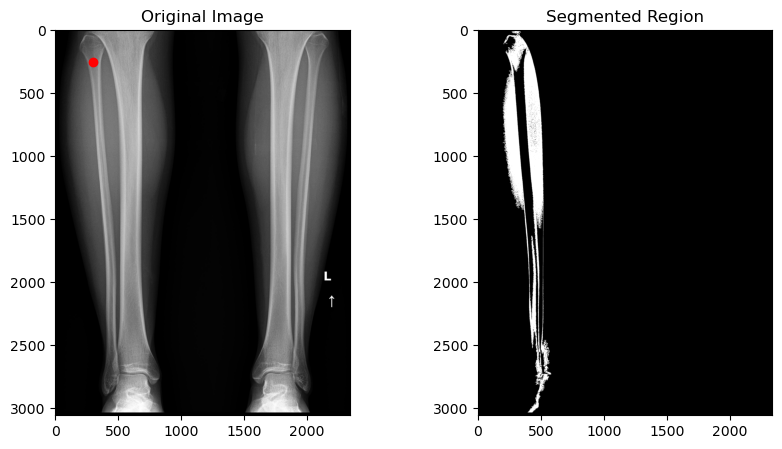

In [10]:
image = cv2.imread('image_legs.jpg', cv2.IMREAD_GRAYSCALE)
seed = (250, 300) 
threshold = 20

segmented = region_growing(image, seed, threshold, connectivity=8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.scatter([seed[1]], [seed[0]], color='red')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Region")
plt.show()

In [11]:
def mean_shift_segmentation(image):
    
    flat_image = image.reshape(-1, 1) #make 2d array of image pixels

    bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=500) #estimate window size based on img
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(flat_image) #mean of all data points
    
    #labels and image reconstruction
    labels = mean_shift.labels_
    segmented_image = labels.reshape(image.shape)
    
    return segmented_image, len(np.unique(labels))

#display images and histograms
def display_images_and_histograms(original, segmented, modes_original, modes_segmented):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    #original img
    ax[0, 0].imshow(original, cmap='gray')
    ax[0, 0].set_title("Original Image")
    ax[0, 0].axis("off")
    
    #segmented img
    ax[0, 1].imshow(segmented, cmap='gray')
    ax[0, 1].set_title(f"Segmented Image (Modes: {modes_segmented})")
    ax[0, 1].axis("off")
    
    #og image histogram
    ax[1, 0].hist(original.ravel(), bins=256, color='black', alpha=0.65)
    ax[1, 0].set_title(f"Histogram of Original Image (Modes: {modes_original})")
    ax[1, 0].set_xlabel("Intensity")
    ax[1, 0].set_ylabel("Frequency")
    
    #segmented img histogram
    ax[1, 1].hist(segmented.ravel(), bins=256, color='black', alpha=0.65)  
    #plt.scatter(bin_edges[peaks], hist_values[peaks], color='red', label=f'Modes: {len(peaks)}')
    ax[1, 1].set_title(f"Histogram of Segmented Image (Modes: {modes_segmented})")
    ax[1, 1].set_xlabel("Intensity")
    ax[1, 1].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()


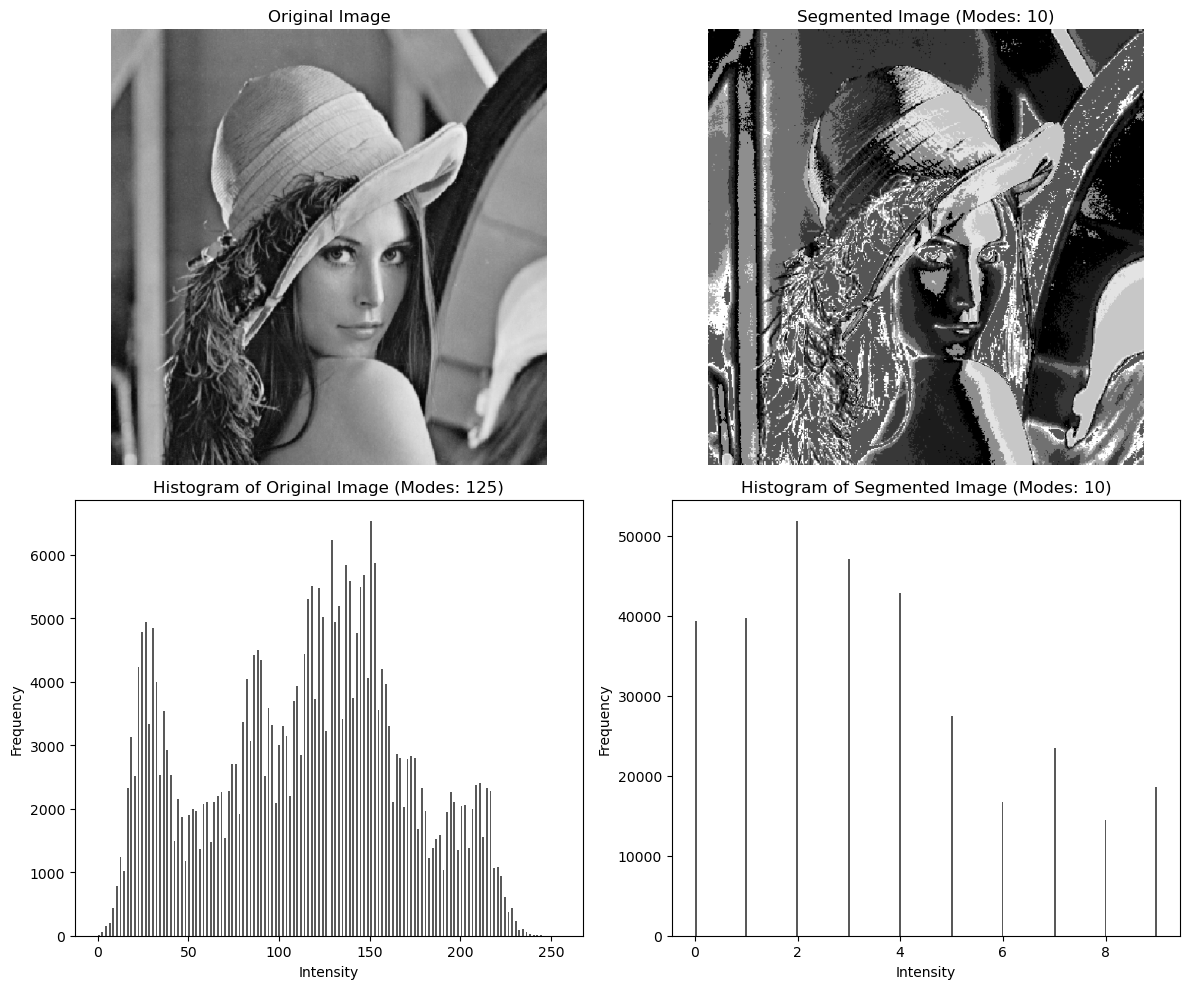

In [12]:
#from scipy.signal import find_peaks

image = cv2.imread ("image.PNG" , cv2.IMREAD_GRAYSCALE)  #load and Ensure grayscale

segmented_image, modes_segmented = mean_shift_segmentation(image)
modes_original = len(np.unique(image))
display_images_and_histograms(image, segmented_image, modes_original, modes_segmented)



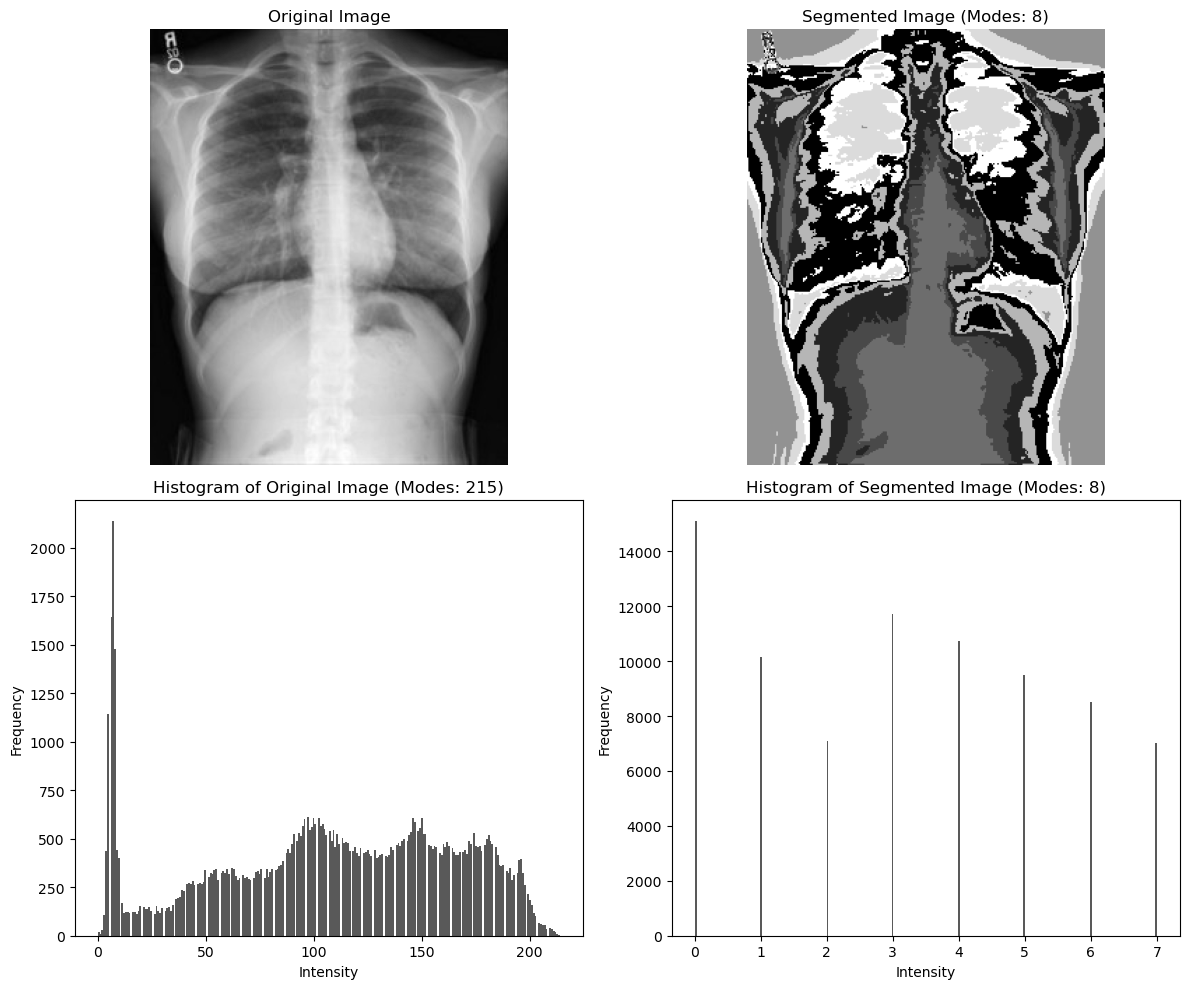

In [13]:
image = cv2.imread ("xray.jpg" , cv2.IMREAD_GRAYSCALE)  #load and Ensure grayscale
segmented_image, modes_segmented = mean_shift_segmentation(image)
modes_original = len(np.unique(image))
display_images_and_histograms(image, segmented_image, modes_original, modes_segmented)